# Data Visualization Project - Ironhack

The dataset (netflix_titles.csv) contains information concerning TV Shows and Movies added to the Netflix catalog, including:

General information: id, title, type (TV Show or Movie), director, cast and a brief description.
Date fields: When the show was released and when it was added to the catalog.
Categorization: Rating and category in which the show is listed.
    
In the present notebook I am going to analize the relation between 
I go through some wrangling, and some exploratory analysis as well, gaining insight of the kind of content available in the Netflix and how the nature of the content has changed (if it changed at all) through the years.

In [12]:
#Explicacion data 

In [13]:
#The UIS is the only statistical agency to provide a global perspective on the world’s most lucrative cultural industry and one of the most popular cultural practices – movie-watching. Demand for data has never been greater as digital technology transforms the ways in which films are produced, distributed and consumed by audiences in theatres and homes.  

#The Institute conducts a biennial survey on feature film and cinema statistics to monitor global trends in selected areas of this industry. This is the only international survey to include countries in all regions and at all stages of development – from Hollywood to Bollywood and Nollywood. It uses comparable definitions to collect data on a range of issues, including the Top 10 films viewed per country; linguistic diversity in film production; admissions; national versus international co-productions per country; and distribution mechanisms.

#The survey provides a unique perspective on how different countries and regions are transforming traditional approaches to the art and industry of film-making. The data can be used to track trends in consumption, for example, by looking at the origins of films viewed versus the most popular films, based on attendance. The data also reflect issues related to cinema infrastructure and access, as reflected by the numbers of indoor cinemas and average ticket prices per capita.  

In [ ]:
#Trends in movie production reflected in the example of Netflix

## Loading data

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import xlrd

In [16]:
titles = pd.read_csv('netflix_titles.csv')
titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


## Basic Information

In [17]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [18]:
titles.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

In [19]:
titles.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## Data Transformation

Enforcing data types

In [32]:
titles.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

The column "date_added" is not a datetime. I convert its values into dates:

In [33]:
titles['date_added'] = pd.to_datetime(titles['date_added'])

In [34]:
titles.dtypes

show_id                  int64
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [21]:
data = pd.read_csv('CUL_DS_12122020171930981.csv')
data

,INDICATOR,Indicator,LOCATION,Country,TIME,Time,Value,Flag Codes,Flags
0,220006,Total number of national feature films produced,AUS,Australia,2011,2011,43.0,NaN,NaN
1,220006,Total number of national feature films produced,AUS,Australia,2012,2012,29.0,NaN,NaN
2,220006,Total number of national feature films produced,AUS,Australia,2013,2013,26.0,NaN,NaN
3,220006,Total number of national feature films produced,AUS,Australia,2014,2014,39.0,NaN,NaN
4,220006,Total number of national feature films produced,AUS,Australia,2015,2015,33.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1762,220170,Number of national feature films shot digitally,FJI,Fiji,2017,2017,NaN,n,Magnitude nil or negligible
1763,220171,Number of national feature films not shot digi...,FJI,Fiji,2016,2016,NaN,n,Magnitude nil or negligible
1764,220171,Number of national feature films not shot digi...,FJI,Fiji,2017,2017,NaN,n,Magnitude nil or negligible
1765,FPFPROD_NADIG,Percentage of national feature films that are ...,FJI,Fiji,2016,2016,NaN,a,Category not applicable


In [22]:
data.columns

Index(['INDICATOR', 'Indicator', 'LOCATION', 'Country', 'TIME', 'Time',
       'Value', 'Flag Codes', 'Flags'],
      dtype='object')

In [21]:
time_use = pd.read_excel('Time-Use-in-OECD-Countries-OECD.xlsx')

In [22]:
time_use

,Country,Category,Time (minutes)
0,Australia,Paid work,211.146630
1,Austria,Paid work,279.532268
2,Belgium,Paid work,194.476452
3,Canada,Paid work,268.660610
4,Denmark,Paid work,199.771596
...,...,...,...
456,UK,Other leisure activities,98.407710
457,USA,Other leisure activities,73.490920
458,China,Other leisure activities,52.963220
459,India,Other leisure activities,109.193439


In [25]:
time_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         461 non-null    object 
 1   Category        461 non-null    object 
 2   Time (minutes)  461 non-null    float64
dtypes: float64(1), object(2)
memory usage: 10.9+ KB


In [23]:
time_use.Category.unique()

array(['Paid work', 'Education', 'Care for household members ',
       'Housework', 'Shopping', 'Other unpaid work & volunteering',
       'Sleep', 'Eating and drinking', 'Personal care', 'Sports',
       'Attending events', 'Seeing friends', 'TV and Radio',
       'Other leisure activities'], dtype=object)

## Exploratory Analysis and Visualization

I will now visualize the above data into various graphs and charts for a better understanding of trends.

In [ ]:
#one scatter plot type of data display that shows the relationship between two numerical variables

In [ ]:
#one histogram A frequency distribution shows how often each different value in a set of data occurs. A histogram is the most commonly used graph to show frequency distributions.

In [ ]:
#one box plot

Most number of titles produced per country

In [36]:
#bar graph
most_titles_produced = titles.groupby('country').count().sort_values('title',ascending=False).head(5)

most_titles_produced.reset_index(inplace=True)
most_titles_produced

,country,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description
0,United States,2032,2032,2032,1475,1808,2026,2032,2029,2032,2032,2032
1,India,777,777,777,721,755,777,777,777,777,777,777
2,United Kingdom,348,348,348,175,291,347,348,348,348,348,348
3,Japan,176,176,176,55,174,175,176,175,176,176,176
4,Canada,141,141,141,88,125,141,141,141,141,141,141


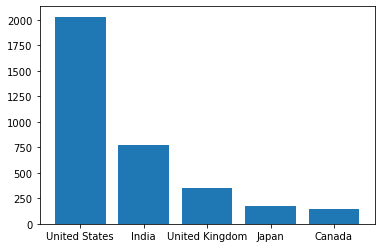

In [37]:
plt.bar(most_titles_produced.country,most_titles_produced.title);
#sns.barplot(x=most_titles_produced.country, y=most_titles_produced.title, data=most_titles_produced)
#hue colors: Movies and TV

In [ ]:
#Explain what insight or information is inferred from these visualizations.

In [ ]:
# Making figures nicer for PPT

# Sources

https://www.kaggle.com/shivamb/netflix-shows
https://stats.oecd.org/Index.aspx?DataSetCode=TIME_USE